In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import vectorbtpro as vbt

## Function Definitions

In [18]:
def draw_candle_chart(sample_df, lines, region = None):
    '''Function takes a OHLCV dataframe and draws candlesticks'''
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    width = .4
    width2 = .05
    #define up and down prices
    up = sample_df[sample_df.Close >= sample_df.Open]
    down = sample_df[sample_df.Close < sample_df.Open]
    #define colors to use
    col1 = 'green'
    col2 = 'red'
    #plot up prices
    plt.bar(up.index, up.Close - up.Open, width, bottom=up.Open, color=col1)
    plt.bar(up.index, up.High - up.Close, width2, bottom=up.Close, color=col1)
    plt.bar(up.index, up.Low - up.Open, width2, bottom=up.Open, color=col1)
    #plot down prices
    plt.bar(down.index, down.Close - down.Open, width, bottom=down.Open, color=col2)
    plt.bar(down.index, down.High - down.Open, width2, bottom=down.Open, color=col2)
    plt.bar(down.index, down.Low - down.Close, width2, bottom=down.Close, color=col2)
    #rotate x-axis tick labels
    plt. xticks (rotation=45, ha='right')
    for x in lines:
        plt.hlines(x, xmin = sample_df.index[0], xmax = sample_df.index[-1])
        if region is not None:
            plt.fill_between(sample_df.index, x-x*region, x+x*region, alpha = 0.4)
    #display candlestick chart
    plt.show()

In [19]:
def draw_line_chart(sample_df, lines, region = None, mavg = None):
    """Draw a line chart for a sample df"""
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)

    if mavg is not None:
        mavg_df = sample_df[["Open", "High", "Low", "Close"]].rolling(window = mavg).mean()
        plt.plot(mavg_df.index, mavg_df.Close)
    else:
        plt.plot(sample_df.index, sample_df.Close)
    
    #rotate x-ticks tick labels
    plt.xticks(rotation = 45, ha = 'right')

    for x in lines:
        plt.hlines(x, xmin = sample_df.index[0], xmax = sample_df.index[-1])
        if region is not None:
            plt.fill_between(sample_df.index, x-x*region, x+x*region, alpha = 0.4)
    #display candlestick chart
    plt. show()

### Fetch HDF Data - GBPUSD (1m) data for last 3 years

In [20]:
gu_m1 = vbt.HDFData.fetch("GU_OHLCV_3Y.h5")

**Check index consistency of time interval (freq) and resample the 1m data to 4hr data**

In [21]:
gu_m1.wrapper.index

DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-27 00:01:00+00:00',
               '2019-08-27 00:02:00+00:00', '2019-08-27 00:03:00+00:00',
               '2019-08-27 00:04:00+00:00', '2019-08-27 00:05:00+00:00',
               '2019-08-27 00:06:00+00:00', '2019-08-27 00:07:00+00:00',
               '2019-08-27 00:08:00+00:00', '2019-08-27 00:09:00+00:00',
               ...
               '2022-08-26 16:50:00+00:00', '2022-08-26 16:51:00+00:00',
               '2022-08-26 16:52:00+00:00', '2022-08-26 16:53:00+00:00',
               '2022-08-26 16:54:00+00:00', '2022-08-26 16:55:00+00:00',
               '2022-08-26 16:56:00+00:00', '2022-08-26 16:57:00+00:00',
               '2022-08-26 16:58:00+00:00', '2022-08-26 16:59:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1122468, freq=None)

**Note**: `freq = None` implies that pandas and vbt does not recognize the time interval (`1m` interval here). Refer: [Resampler](https://vectorbt.pro/pvt_bd9359bf/tutorials/mtf-analysis/)

In [22]:
h4_ohlcv = gu_m1.get().resample("4h").agg({"Open": "first", "High": "max", "Low": "min", "Close": "last", "Volume": "sum"})
display(h4_ohlcv)

,Open,High,Low,Close,Volume
time,,,,,
2019-08-27 00:00:00+00:00,1.221095,1.225280,1.220900,1.225030,3.087917e+10
2019-08-27 04:00:00+00:00,1.225045,1.227655,1.224060,1.226965,4.512783e+10
2019-08-27 08:00:00+00:00,1.226960,1.231000,1.225215,1.228735,6.021476e+10
2019-08-27 12:00:00+00:00,1.228740,1.230380,1.228095,1.228765,2.032644e+10
2019-08-27 16:00:00+00:00,1.228780,1.229225,1.228045,1.228070,7.616710e+09
...,...,...,...,...,...
2022-08-26 00:00:00+00:00,1.182580,1.182615,1.177895,1.178830,1.852738e+10
2022-08-26 04:00:00+00:00,1.178845,1.184380,1.177785,1.182145,2.676285e+10
2022-08-26 08:00:00+00:00,1.182135,1.189770,1.175390,1.177480,7.900152e+10


### Taking a slice of the data

In [23]:
index_slice = slice(100, 500)
sample_df = h4_ohlcv.iloc[index_slice]
sample = h4_ohlcv.iloc[index_slice][['Close']].to_numpy().flatten()
sample_original = sample.copy()

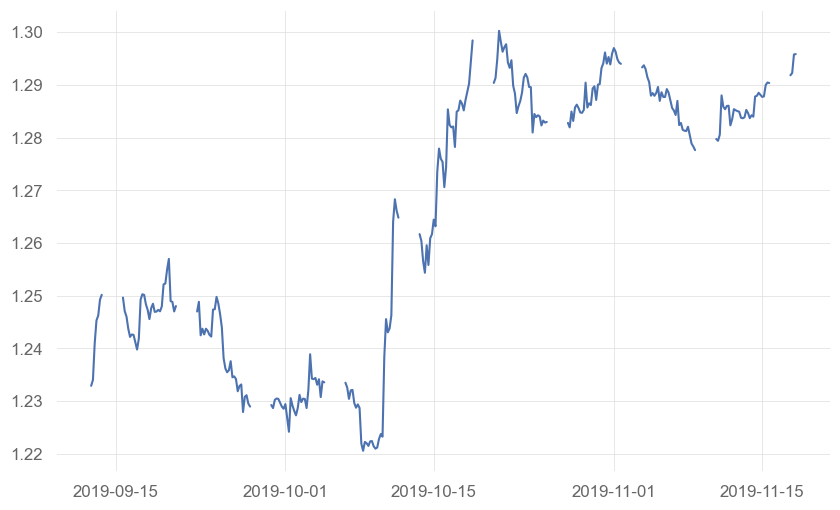

In [24]:
plt.plot(sample_df.index, sample_df.Close)

### Grab Turning Points

In [25]:
from scipy.signal import argrelextrema

maxima = argrelextrema(sample, np.greater)
minima = argrelextrema(sample, np.less)

extrema = np.concatenate((maxima, minima), axis = 1)[0]
extrema_prices = np.concatenate((sample[maxima], sample[minima]))

/opt/miniconda3/envs/vbt/lib/python3.10/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


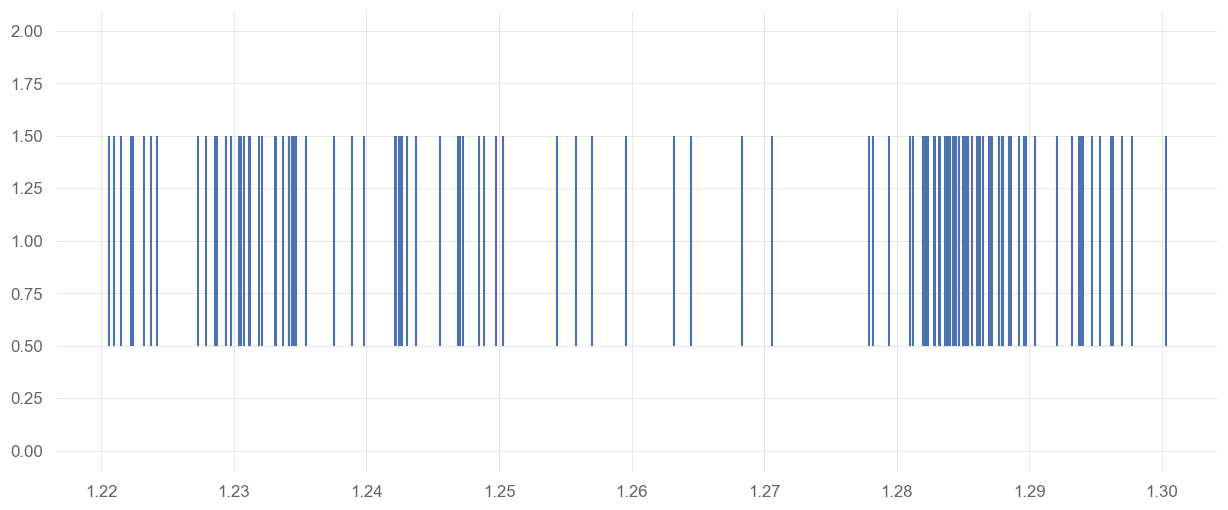

In [26]:
f = plt.figure()
f.set_figwidth(15)
plt.hlines(1, sample_original.min(), sample_original.max())
plt.eventplot(extrema_prices, orientation = 'horizontal', colors = 'b')
plt.show()

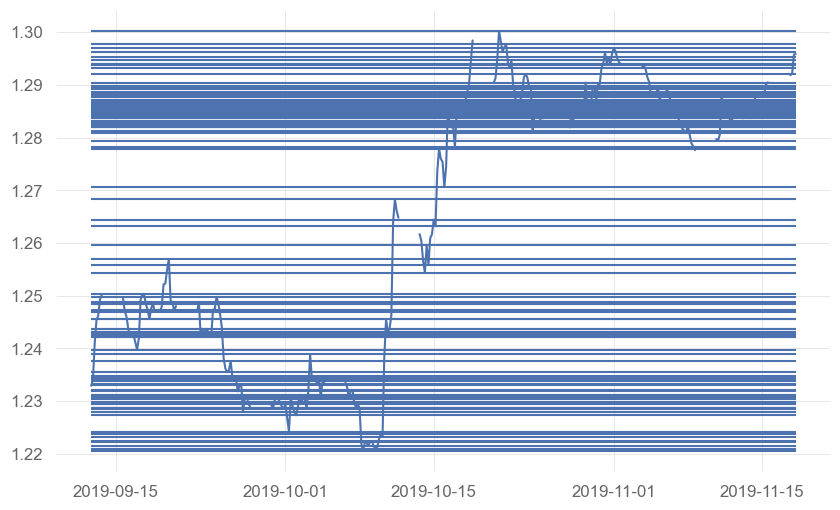

In [27]:
plt.plot(sample_df.index, sample_df.Close)
for x in extrema_prices:
    plt.hlines(x, xmin = sample_df.index[0], xmax = sample_df.index[-1])

**Estimate Probability Density Function**

Initial Extrema Price: 1.2426400000000002


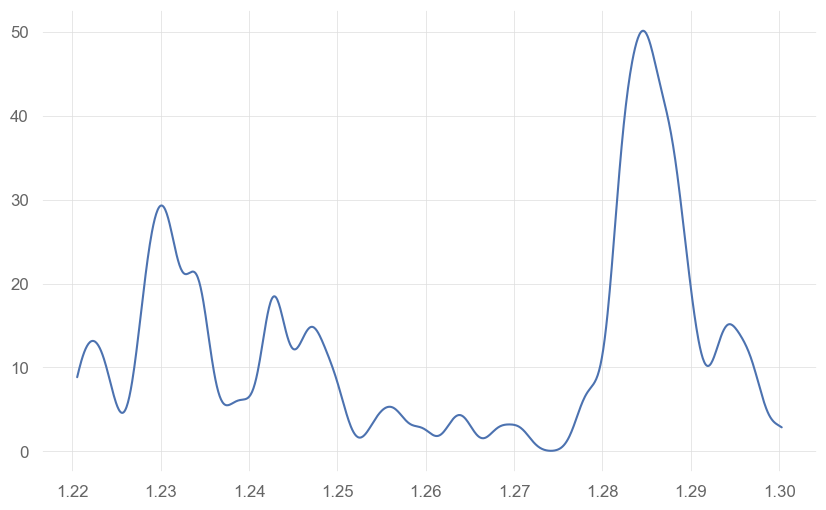

In [28]:
from sklearn.neighbors import KernelDensity

initial_price = extrema_prices[0]
print("Initial Extrema Price:", initial_price)

## thedenominator in the bandwidth is an impoprtant parameter to smooth out the kde plot or make it more spiky
## Lower values close like 100 make it look like a normal distrbution
kde = KernelDensity(kernel = 'gaussian', bandwidth= initial_price/1000).fit(extrema_prices.reshape(-1,1))

a,b = min(extrema_prices), max(extrema_prices)
price_range = np.linspace(a,b,1000).reshape(-1,1)
pdf = np.exp(kde.score_samples(price_range))
plt.plot(price_range, pdf)

### Plot Results

In [29]:
from scipy.signal import find_peaks

peaks = find_peaks(pdf)[0]

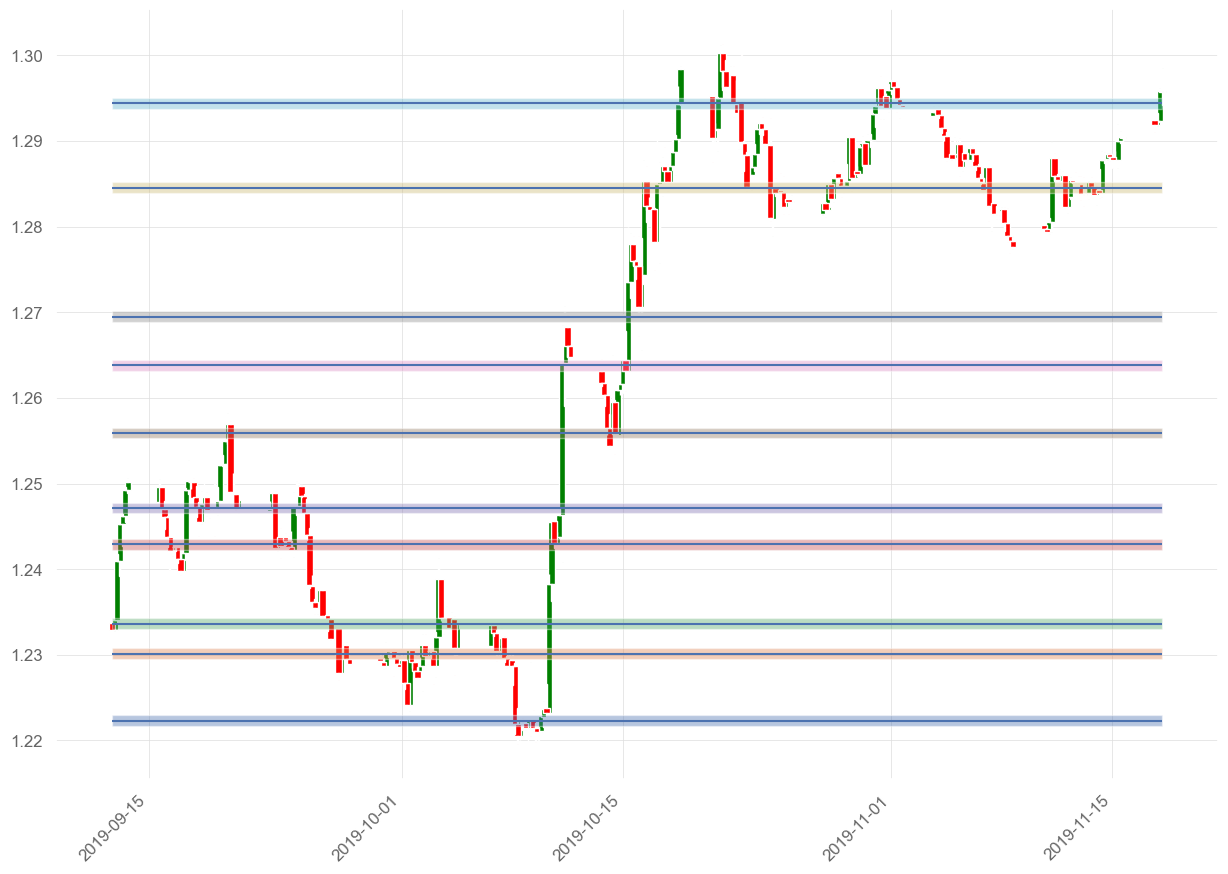

In [30]:
draw_candle_chart(sample_df, price_range[peaks], region = 0.0005)

### Automated Bandwidth Selection

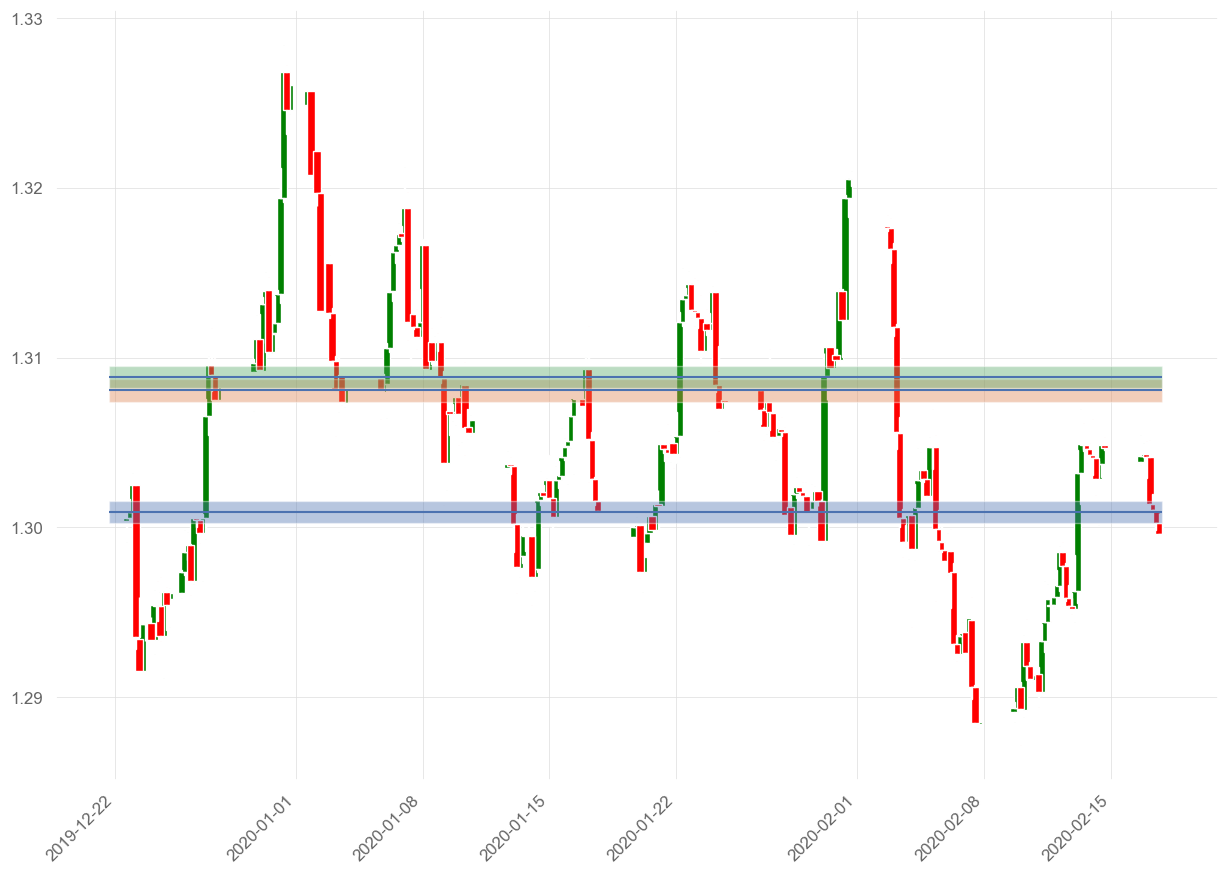

In [31]:
from scipy.signal import argrelextrema, find_peaks
from sklearn. neighbors import KernelDensity

## Input parameters
index_slice = slice(700,1050)
peaks_range = [2,4]
num_peaks = -999


sample_df = h4_ohlcv.iloc[index_slice]
sample = h4_ohlcv.iloc[index_slice][["Close"]].to_numpy().flatten()
sample_original = sample.copy()

maxima = argrelextrema(sample, np.greater)
minima = argrelextrema (sample, np.less)

extrema = np.concatenate((maxima, minima), axis=1)[0]
extrema_prices = np.concatenate((sample[maxima], sample[minima]) )
interval = extrema_prices[0]/10000

bandwidth = interval

while num_peaks < peaks_range[0] or num_peaks > peaks_range[1]:
    initial_price = extrema_prices[0]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(extrema_prices.reshape(-1,1))
    a, b = min(extrema_prices), max(extrema_prices)
    price_range = np.linspace(a, b, 1000).reshape(-1,1)
    pdf = np.exp(kde.score_samples(price_range))
    peaks = find_peaks(pdf)[0]

    num_peaks = len (peaks)
    bandwidth += interval
    if bandwidth > 100*interval:
        print("Failed to converge, stopping...")
        break

draw_candle_chart(sample_df, price_range[peaks], region = 0.0005)

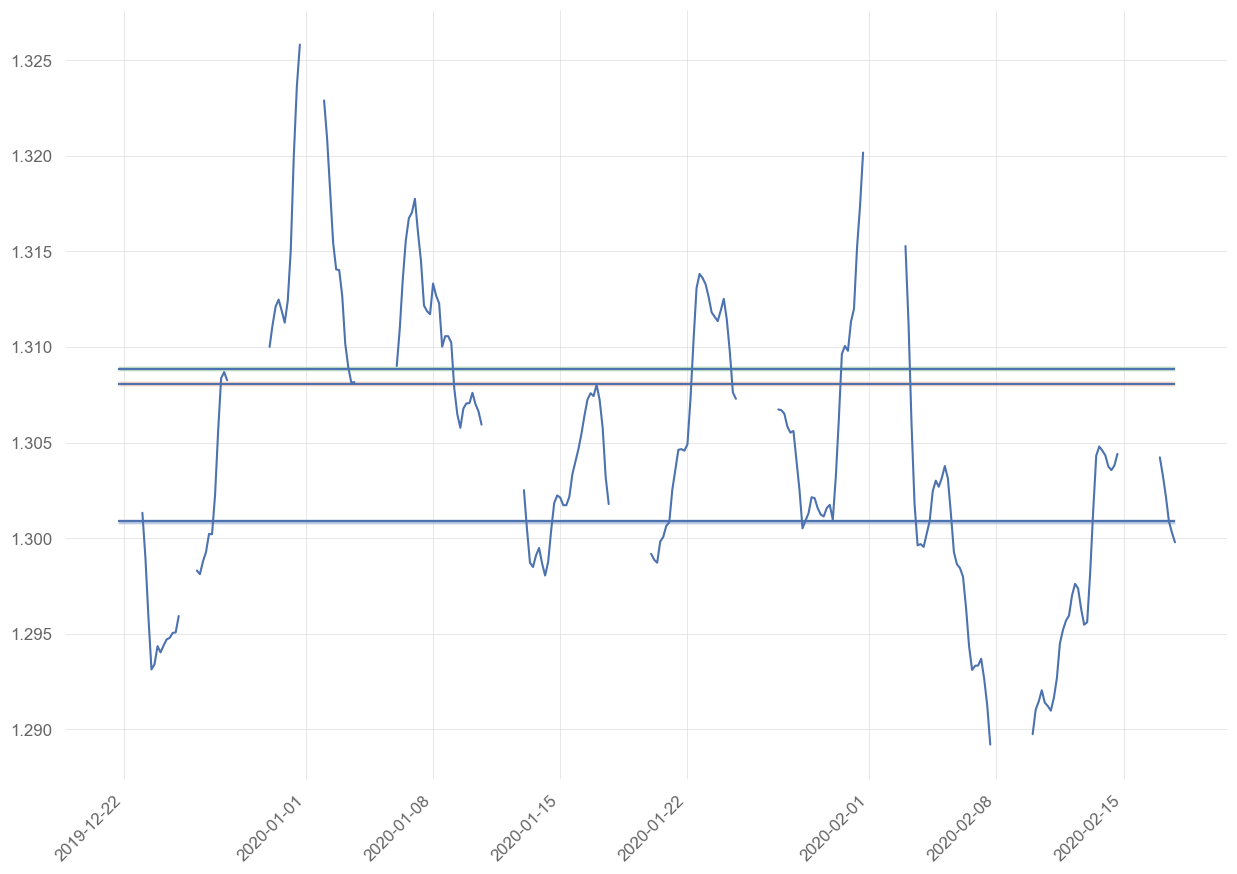

In [32]:
draw_line_chart(sample_df, price_range[peaks], region = 0.0001, mavg = 3)